# 《合成孔径雷达成像——算法与实现》中3.2.2 线性调频脉冲的频谱

## 图3.3 不同时间带宽积（TBP）的FFT频谱变化



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fftshift
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [11]:
def phase(G): # Calculates the phase of a complex number 
    PHI=np.arctan2(np.imag(G),np.real(G));
    N=PHI.size;
    DF=PHI[:N-1]-PHI[1:];
    idx = np.where(np.abs(DF)>3.5)
    ii = []
    for each in idx:
        for i in each:
             ii.append(i)
    
    for j in ii:
        a1 = np.ones(N)
        a1[:j+1] = 0
        PHI=PHI+2*np.pi*np.sign(DF[j])*a1;
    return PHI

上面的函数是用于计算相位

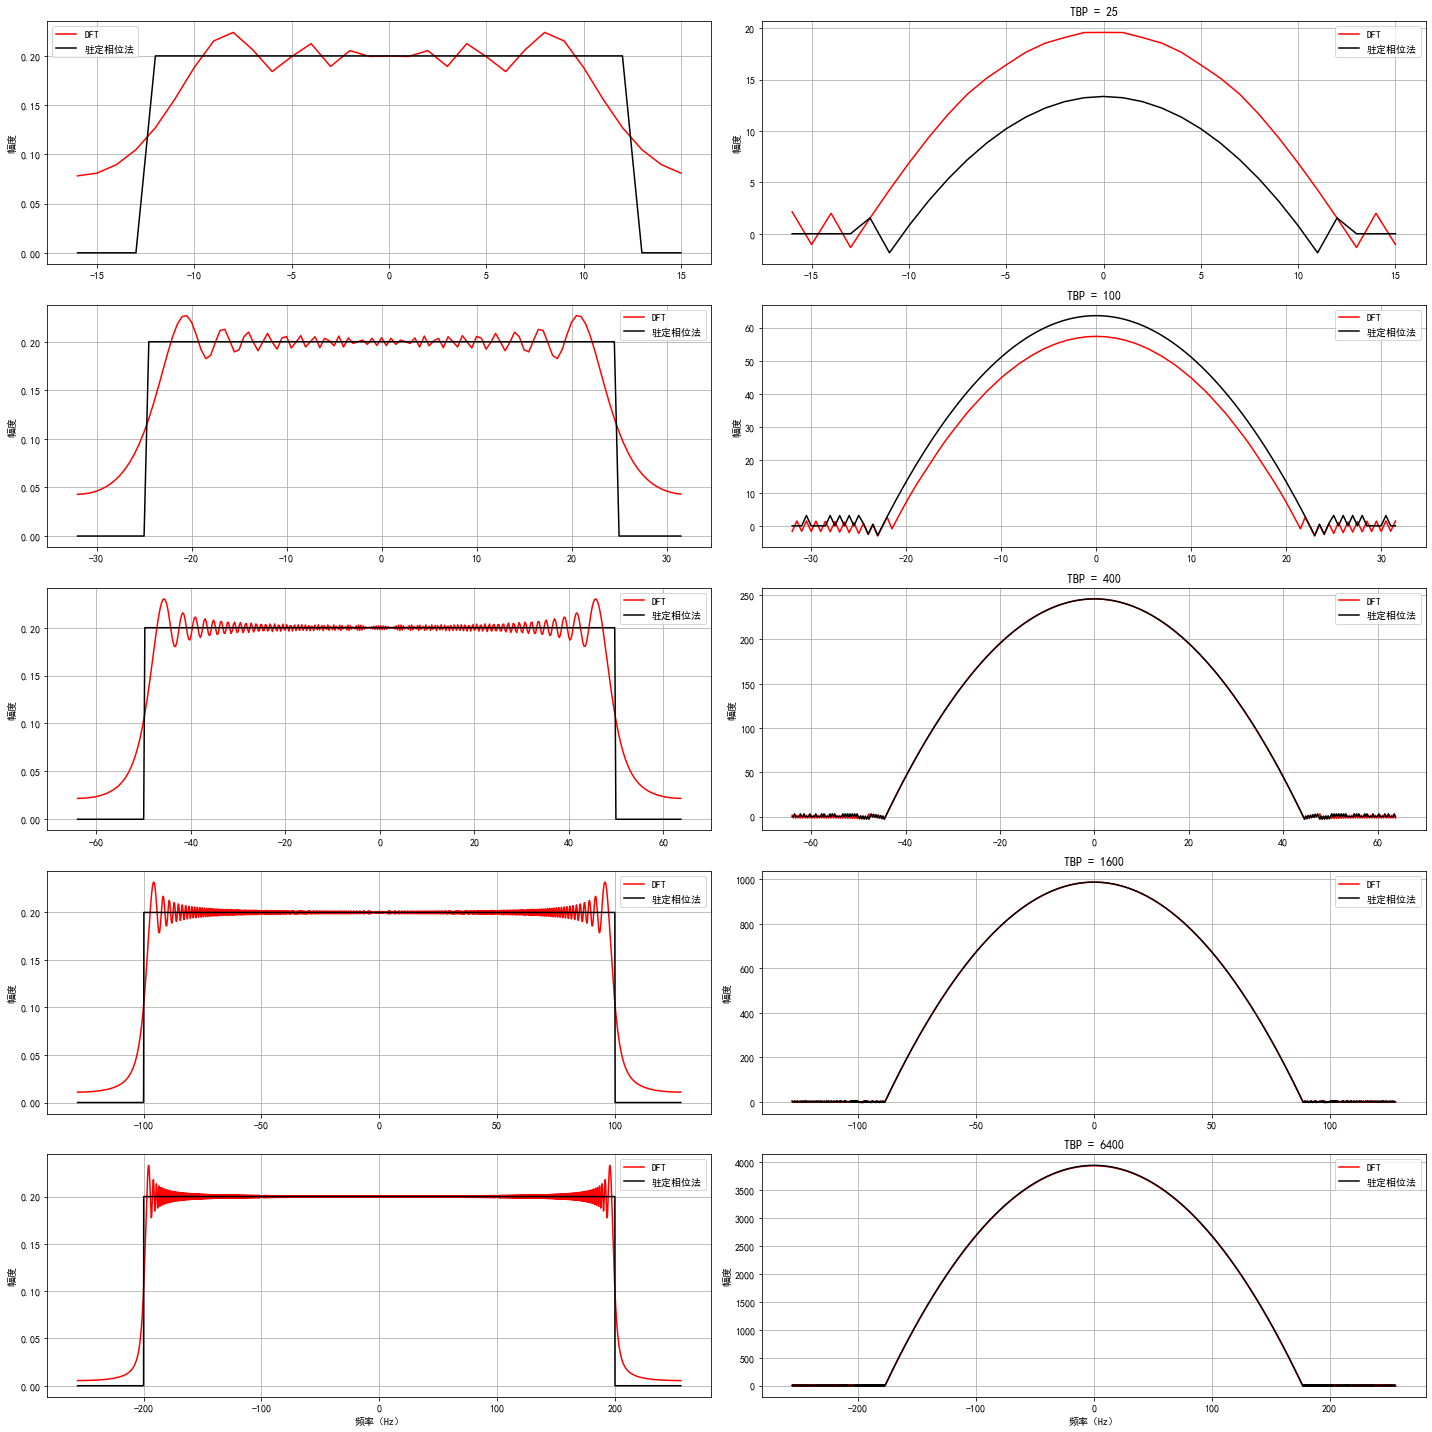

In [13]:
#% 设置调频斜率K 和 基本时间长度T0
K  = 25;
T0 = 1;

fig         = plt.figure(figsize=(20, 20)) #; set( h, 'position', [100,10,600,700]);
sub_row   = 5;
sub_col   = 2;
sub_count = 0;

#% 迭代
T = T0;
for times in range(5):
    
    #% 计算脉冲宽度
    T = T0 * 2**(times);
    #% 计算B和TBP
    B   = K*T;
    TBP = B*T;
    
    #% 生成抽样时间间隔dt
    fs = 1.25*B;
    dt = 1/fs;
    Nt = int(np.ceil(T/dt))
    
    #% 对抽样参数进行修正
    Nt = 2**( int(np.ceil( np.log2(Nt) )) );
    dt = T/Nt;
    fs = 1/dt;
    
    #% 生成时间序列t和信号st
    t  = np.arange(-T/2,T/2,dt)
    st = np.exp( 1j*np.pi*K*t**2 );
    
    #% 得到频点
    freq = np.arange(0,Nt,1 )*fs / Nt - fs/2;
    
    #% 进行fft 得到频谱sw
    sw = fftshift( fft( fftshift( st ) ) ) * dt;
    #% 得到驻定相位法得到的频谱sw2
    
    sw2 = 1/np.sqrt(np.abs(K)) * np.exp(-1j*np.pi*freq**2/K) * np.where( (np.abs(freq)<B/2.0),1,0 )
    if K > 0:
        sw2 = sw2*np.exp(1j*np.pi/4);
    else:
        sw2 = sw2*np.exp(-1j*np.pi/4);

    #% 画图 频谱幅度
    sub_count = sub_count + 1; 
    plt.subplot( sub_row, sub_col, sub_count );
    plt.plot( freq, np.abs(sw), 'r', freq, np.abs(sw2), 'k' );plt.legend(labels=['DFT','驻定相位法']);
    plt.ylabel('幅度'); plt.grid( )
    if times == 4:
       plt.xlabel('频率（Hz）');  

    
    #% 画图 频谱相位
    sub_count = sub_count + 1; 
    plt.subplot( sub_row, sub_col, sub_count );
    plt.plot( freq, phase(sw), 'r', freq, phase(sw2), 'k' );plt.legend(labels=['DFT','驻定相位法']);
    plt.ylabel('幅度'); plt.grid( ); plt.title( 'TBP = '+str(TBP) );
    if times == 4:
       plt.xlabel('频率（Hz）');  
    plt.tight_layout()
       
    


本文Python代码参考Matlab代码自 https://www.freesion.com/article/5069821906/